Numerical Sultions for ideal pendulum

In [1]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


In [2]:
#This is from tutorial
from matplotlib.pyplot import *
%matplotlib inline
 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

In [3]:
#This is from tutorial
# populate the interactive namespace with the function 
# that solves ODEs
from scipy.integrate import odeint

# populate the interactive namespace with the function 
# that makes 1d interpolation
from scipy.interpolate import interp1d

In [4]:
#Differential equation to solve
def dy_dt(theta,t,emega0,delta):
    theta1,theta2 = theta
    dydt = [theta2, -(omega0**2*sin(theta1)*(1-delta*(abs(sin(theta1)))))]
    return dydt

Part a

In [5]:
# from initial conditions
theta = [pi/2,0]

#time interval and time steps
t_start = 0
t_end = 15
step = 1000
t = linspace(t_start,t_end,step)

#delta varivle
delta = 0

L = 1.0 #in metres
g = 9.8 #m/s^2
omega0 = sqrt(g/L)

In [6]:
#solve equation and obtain two sets of values:
#theta and its rate of change
sol = odeint(dy_dt,theta,t,args =(omega0,delta))

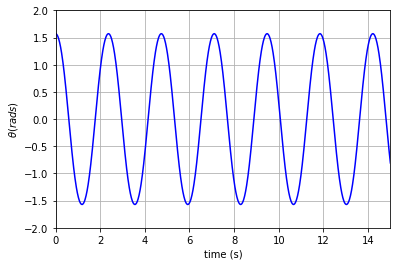

In [7]:
#Plot solution set againts time to help
#visualise problem
figure(1)
ylim(bottom = -2, top = 2)
xlim(left = 0,right = 15)
xlabel("time (s)")
ylabel("$\\theta (rads)$")
plot(t,sol[:,0], "b")
grid()

In [8]:
#This is to find the period by interpolating when theta = 0,
#and then multiplying by 4. We see theta starts and its maximum,
#and the first time it reaches zero, as seen from graph,
#is when it is 1/4 through its cycle.
def period(sol,t):
    angle = sol[0,0]
    n = 0
    #keep going until we hit or are past angel = 0
    while angle > 0.0:
        n += 1
        angle = sol[n,0]

    #Ensures angle = 0 is within set
    n = n+10

    #interpolate from t = 0 to after angle = 0
    f = interp1d(sol[0:n,0],t[0:n])

    # test to check we get a reasonable result
    T = 4.0*f(0.0)
    return T ,f

In [9]:
T,f = period(sol,t)

In [11]:
#This is the predicted period
T_pred = 2*pi/omega0
print(T_pred)

2.007089923154493


In [12]:
#if we rearrange the equation for non-linear period T=(2pi/omega0)/sqrt(1-(theta^2)/8)
#in terms of T as the independent variable, we get:
rho = (T_pred/T) #since 2*pi/omega0 = T_pred
kappa = 1 - rho**2
angle = (1/sqrt(8))*sqrt(kappa)
print(angle)

0.18782651329761635


In [13]:
#solve for new angle
theta2 = [angle,0]
sol2 = odeint(dy_dt,theta2,t,args =(omega0,delta))

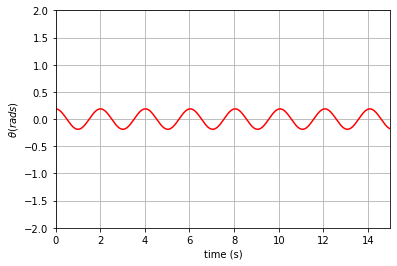

In [14]:
#If we compare this to previous figure, we can see that 7 full peaks occur here
#where as only 6 occured in the other. So we can be sure that the period has indeed increased
#as expected
figure(2)
ylim(bottom = -2, top = 2)
xlim(left = 0,right = 15)
xlabel("time (s)")
ylabel("$\\theta (rads)$")
plot(t,sol2[:,0], 'r')
grid()

In [15]:
#find period
T2,f2 = period(sol2,t)

In [16]:
T2

2.011524335500916

In [17]:
#check percentage difference
(-T_pred+T2)/T2*100

0.22045034545002334

In [18]:
T_pred/T2*100

99.77954965454998

So we are accurate to within 99% of expected value

Part b


In [19]:
#the idea is to make a list of all the periods with the same initial angle
#associated with a particular delta. So if there is a dependence on delta, each
#period will be different

#lists to store variables
T_list = []
d_list = []
#initialise values
theta = [pi/2,0]
t_start = 0
t_end = 15
step = 1000
t = linspace(t_start,t_end,step)
L = 1.0 
g = 9.8 
omega0 = sqrt(g/L)
delta = 0
index = 0
n = 100
d_step = 1/100

#this will run n times
while delta < 1:
    
    #solve ODE for given delta
    sol3 = odeint(dy_dt,theta,t,args = (omega0,delta))
    
    #find associated period
    T3,f3 = period(sol3,t)
    
    #add both to lists
    T_list.append(T3)
    d_list.append(delta)
    
    #move to next delta
    delta += d_step

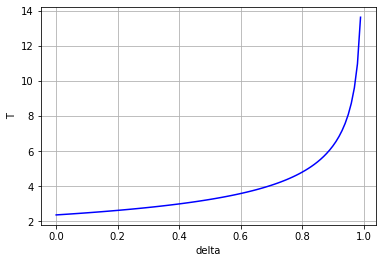

In [20]:
#Graph results
figure(3)
xlabel("delta")
ylabel("T")
plot(d_list,T_list, 'b')
grid()

Part C

We can see from the previous graph that there is a vertical tanget at delta = 1. We
can then conclude that T approaches infinity as delta appraoches 1. Then the frequency
becomes zero, so the pendulum has stopped moving at delta = 1.